# Equipo 5 - 2 Hydraprobe en simultáneo, pruebas

Columnas de datos:
- datetime
- voltaje
- humedad ambiente
- temperatura ambiente
- 10 valores del hydraprobe 2
- 10 valores del hydraprobe 4

Las 9 columnas del Hydraprobe son:
- ID sensor (22 o 44 para estos dos)
- H soil moisture
- J soil coductivity (temp corrected)
- F soil temp (celsius)
- G soil temp (Farenheit)
- O soil conductivity
- K Real Dielectric Permittivity
- M Imaginary Dielectric Permittivity
- L Real Dielectric Permittivity (temp. corrected)
- N Imaginary Dielectric Permittivity (temp. Corrected)

In [2]:
import os
import datetime
import glob

import pandas as pd
import plotly.graph_objects as go

In [21]:
path = r'data/EQ5-HS/prueba_depto/'                     # use your path
all_files = glob.glob(os.path.join(path, "*.CSV"))     # advisable to use os.path.join as this makes concatenation OS independent
all_files = sorted(all_files, reverse=False)

dfs = (pd.read_csv(f, sep=";", parse_dates=['datetime'], names=['datetime', 'voltaje', 'hume_amb', 'temp_amb','id2', 'hume_suelo2', 'conduc2', 'temp_sueloC2', 'tsF2', 'O2', 'K2', 'M2','L2','N2', 'id4', 'hume_suelo4', 'conduc4', 'temp_sueloC4', 'tsF4', 'O4', 'K4', 'M4','L4','N4'], comment='#') for f in all_files)
eq5 = pd.concat(dfs, ignore_index=True)
eq5.tail()

datetime  voltaje  hume_amb  temp_amb  id2  hume_suelo2  \
1556 2021-08-24 12:25:21     4.33         0       0.0   22        0.203   
1557 2021-08-24 12:30:19     4.33         0       0.0   22        0.198   
1558 2021-08-24 12:35:21     4.33         0       0.0   22        0.203   
1559 2021-08-24 12:40:19     4.33         0       0.0   22        0.205   
1560 2021-08-24 12:45:21     4.33         0       0.0   22        0.195   

      conduc2  temp_sueloC2  tsF2     O2  ...  id4  hume_suelo4  conduc4  \
1556    0.030         15.22  59.4  0.026  ...   44        0.201    0.029   
1557    0.030         15.42  59.6  0.026  ...   44        0.201    0.029   
1558    0.030         15.42  59.6  0.026  ...   44        0.197    0.030   
1559    0.030         15.42  59.6  0.026  ...   44        0.197    0.030   
1560    0.031         15.42  59.6  0.027  ...   44        0.195    0.030   

      temp_sueloC4  tsF4     O4       K4     M4      L4      N4  
1556         15.44  59.6  0.025  12.5424  9.112  12.562  10.479  
1557         15.44  59.6  0.025  12.5434  9.113  12.565  10.470  
1558         15.54  59.9  0.026  12.2834  9.316  12.304  10.703  
1559         15.54  59.9  0.026  12.2834  9.316  12.304  10.703  
1560         15.54  59.9  0.026  12.1784  9.457  12.201  10.854  

[5 rows x 24 columns]

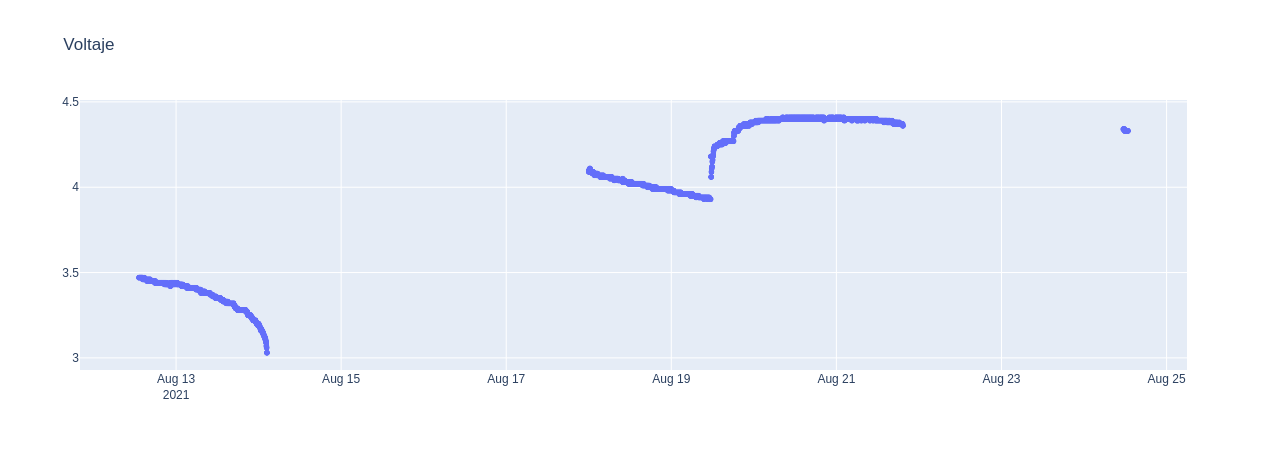

In [22]:
fig = go.Figure()
fig.add_trace(go.Scattergl(x=eq5.datetime, y=eq5.voltaje,  mode='markers'))

fig.update_layout(title="Voltaje")
fig.show()

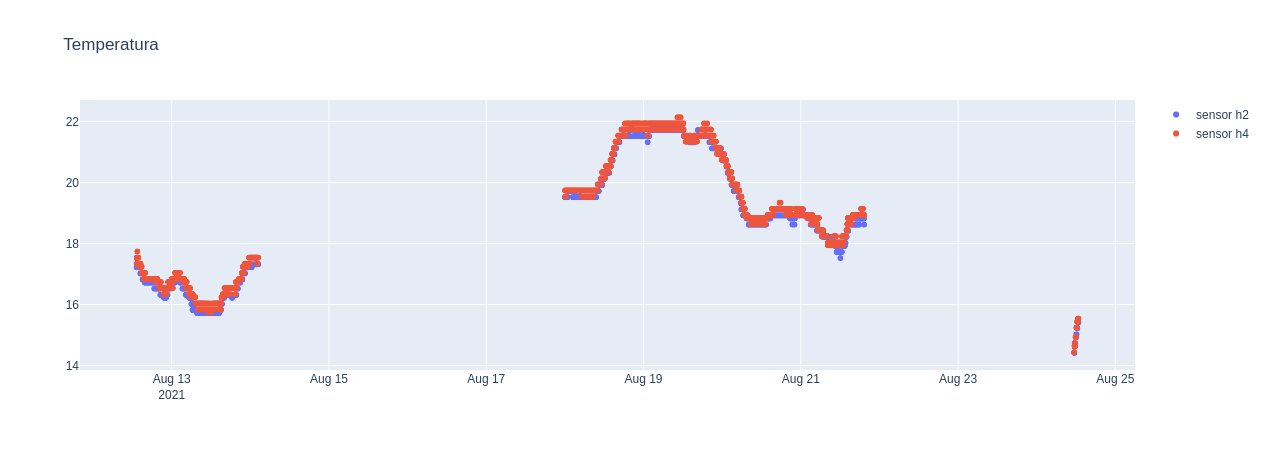

In [23]:
fig = go.Figure()
fig.add_trace(go.Scattergl(x=eq5.datetime, y=eq5.temp_sueloC2,  mode='markers', name='sensor h2'))
fig.add_trace(go.Scattergl(x=eq5.datetime, y=eq5.temp_sueloC4,  mode='markers', name='sensor h4'))

fig.update_layout(title="Temperatura")
fig.show()